# Lab 9. Adnotacje na wykresach oraz formatowanie tabel danych w Jupyter notebook.

## 1. Adnotacje

Oprócz surowych danych oraz podstawowych informacji na obszarze wykresów takich jak legenda czy etykiety osi możemy również "dekorować" wykres dodatkowymi informacjami takimi jak linie, symbole czy tekst umieszczane we wskazanych miejscach wykresu. Umiejscowienie tych elementów zazwyczaj odbywa się w odniesieniu do wartości na obu osiach, ale może być również podane jako wartość bezwzględna, np. w postaci współrzędnych wyrażonych w pikselach.

**Przykład 1 - linia pionowa**

Linia pionowa we wskazanym przez wartość na osi `x` miejscu.
Dokumentacja:
* https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html
* https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axvline.html
* https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axhline.html

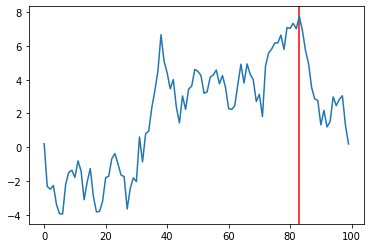

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dane do wykresu

values = np.random.randn(100).cumsum()
# linia o "nieskończonej" długości
plt.axvline(np.argmax(values), color='r')
sns.lineplot(data=values);

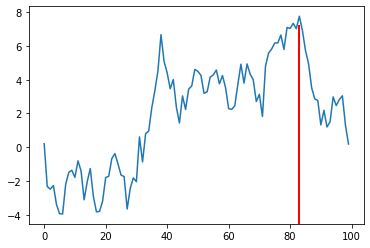

In [3]:
# zapisujemy obiekt wykresu do zmiennej
fig = sns.lineplot(data=values)
# w Seaborn możemy pobrać referencję do obiektu osi z obiektu wykresu
ax = fig.axes
# wartości maksymalne dla osi y, do wyznaczenia końca linii pionowej
ymin, ymax = ax.get_ylim()
# długość linii to wartość z przedziału [0,1], więc musimy wyliczyć punkt końca linii
end_point = (abs(np.min(values)) + abs(np.max(values))) / (abs(ymin) + abs(ymax))
plt.axvline(np.argmax(values), ymax=end_point, linewidth=2, color='r');

**Przykład 2 - obiekty graficzne**

Zazwyczaj będą to symbole w postaci strzałek, prostych obiektów geometrycznych, tekstu.
**Dokumentacja:**
* https://matplotlib.org/3.5.0/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html
* https://matplotlib.org/stable/gallery/index.html#text-labels-and-annotations

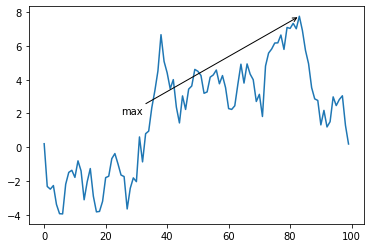

In [4]:
# zapisujemy obiekt wykresu do zmiennej
fig = sns.lineplot(data=values)

# w Seaborn możemy pobrać referencję do obiektu osi z obiektu wykresu
ax = fig.axes
# parametr xy określa współrzędne x1, y1 - tutaj punkt w który wskzuje grot strzałki
# parametr xytext to współrzędne x2, y2 - początek strzałki oraz położenie tekstu (opcjonalny)
# parametry xycoords oraz textcoords to informacja o tym, że współrzędne będą przekazywane jako wartości
# z danych (czyli 10 oznacza punkt, który reprezentuje wartość 10 na osi, a nie 10-element)
ax.annotate("max",
            xy=(np.argmax(values), np.max(values)), xycoords='data',
            xytext=(len(values)/4, np.mean(values)), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            );

**Przykład 3 - wypełnienie obszaru**

Dokumentacja:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between


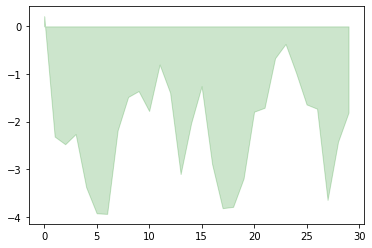

In [5]:
# x oraz y1 zawierają koordynaty, które zostaną wypełnione wskazanym kolorem
# oba wektory muszą być równoliczne
# tutaj pobieramy pierwsze 30 wartości całego zbioru
plt.fill_between(
        x = list(range(30)),
        y1 = values[:30],
        color= "g",
        alpha= 0.2)

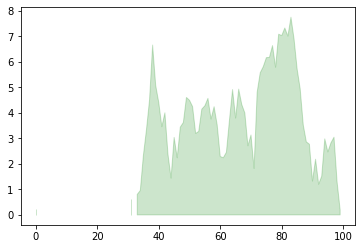

In [6]:
# tutaj kolorujemy dane dla całego wykresu, ale odfiltrowane dla wartości
# z wektora, które spełniają dany warunek (tablica bool)
plt.fill_between(
        x = list(range(len(values))),
        y1 = values,
        where = (values > 0),
        color= "g",
        alpha= 0.2);

# 2. Formatowanie ramek biblioteki pandas (Jupyter Notebook)
Oprócz możliwości wypisania ramki DataFrame w postaci dość przejrzyście sformatowanej ramki HTML możliwe jest określenie własnych styli oraz warunków formatowania takiego wyjścia.

> **UWAGA**: aktualnie nie wszystkie poniższe przykłady powodują widoczność odpowiedniego efektu dla zasosowanej wersji biblioteki. Rozwiązanie tego problemu zostanie przedstawione na kolejnych zajęciach (jeżeli twórcy biblioteki takie zapewnią).

**Przykład 4**

**Dokumentacja:**

* https://pandas.pydata.org/docs/user_guide/style.html
* https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/
* https://coderzcolumn.com/tutorials/python/simple-guide-to-style-display-of-pandas-dataframes

In [7]:
df = pd.read_csv('data/pkn.txt')
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   <TICKER>   5583 non-null   object        
 1   <PER>      5583 non-null   object        
 2   <DATE>     5583 non-null   datetime64[ns]
 3   <TIME>     5583 non-null   int64         
 4   <OPEN>     5583 non-null   float64       
 5   <HIGH>     5583 non-null   float64       
 6   <LOW>      5583 non-null   float64       
 7   <CLOSE>    5583 non-null   float64       
 8   <VOL>      5583 non-null   int64         
 9   <OPENINT>  5583 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 436.3+ KB


In [10]:
# dla potrzeb przykładu wybierzemy tylko niewielki wycinek danych
df10 = df.head(10)
df10

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PKN,D,1999-11-26,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,1999-11-29,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,1999-11-30,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,1999-12-01,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,1999-12-02,0,15.818,16.297,15.745,15.954,3304014,0
5,PKN,D,1999-12-03,0,15.954,16.225,15.818,16.159,2357914,0
6,PKN,D,1999-12-06,0,16.297,16.847,16.297,16.776,3005048,0
7,PKN,D,1999-12-07,0,16.711,16.776,16.503,16.503,2426246,0
8,PKN,D,1999-12-08,0,16.503,16.911,16.503,16.639,3807338,0
9,PKN,D,1999-12-09,0,16.639,16.639,16.225,16.503,2513405,0


In [18]:
# przykład formatowania wyświetlanych wartości (tylko na wyjściu)
df10.style.format(precision=3
                  ,thousands=" "
                  ,formatter={'<OPEN>': lambda x: f"{x:,.3f} zł"})

,,,,,,,,,,
0,PKN,D,1999-11-26 00:00:00,0,15.268 zł,15.403,14.715,15.194,15 857 000,0
1,PKN,D,1999-11-29 00:00:00,0,15.124 zł,15.194,14.852,14.923,5 499 196,0
2,PKN,D,1999-11-30 00:00:00,0,15.060 zł,15.330,15.060,15.194,3 287 087,0
3,PKN,D,1999-12-01 00:00:00,0,15.330 zł,15.674,15.194,15.674,3 077 747,0
4,PKN,D,1999-12-02 00:00:00,0,15.818 zł,16.297,15.745,15.954,3 304 014,0
5,PKN,D,1999-12-03 00:00:00,0,15.954 zł,16.225,15.818,16.159,2 357 914,0
6,PKN,D,1999-12-06 00:00:00,0,16.297 zł,16.847,16.297,16.776,3 005 048,0
7,PKN,D,1999-12-07 00:00:00,0,16.711 zł,16.776,16.503,16.503,2 426 246,0
8,PKN,D,1999-12-08 00:00:00,0,16.503 zł,16.911,16.503,16.639,3 807 338,0
9,PKN,D,1999-12-09 00:00:00,0,16.639 zł,16.639,16.225,16.503,2 513 405,0


In [24]:
# formatowanie wartości maksymalnych w kolumnach
df10.style.highlight_max(df10.loc[:,'<OPEN>'], color = '#567654')

KeyError: "None of [Float64Index([15.268, 15.124, 15.06, 15.33, 15.818, 15.954, 16.297, 16.711,\n              16.503, 16.639],\n             dtype='float64')] are in the [columns]"